# Calculate performance of the Faster R-CNN model based on IoU

## Set Working Directory

In [3]:
# if get error "ImportError: No module named utils"
# change working directory

# ONLY NEED TO RUN THIS CELL ONCE

import os
os.chdir('./stage2/FasterRCNN')
os.getcwd()

'/Users/mingrenshen/PycharmProjects/MedImgAnalysis/stage2/FasterRCNN'

## Load Library

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from utils import imageUtils
from utils import postProcessing
from utils import DetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [6]:
#load Data
root = './TestData'
#dataset = MultiDetectionDataset(data_dir=root, split='train')
dataset_test = DetectionDataset(data_dir=root, split='test')
bbox_label_names = ('Bleeding')

# DataSet Statistics
#print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_test))
print('type of defects: ', bbox_label_names)

('total number of test images: ', 10)
('type of defects: ', 'Bleeding')


## Load Tranied Model

In [7]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=1, 
                        pretrained_model='./result/snapshot_model_100000.npz', 
                        ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1000, 
                        max_size=1000,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('Bleeding')

### IoU Caculation

Test image 0


[[81.79134368896484, 479.73974609375, 189.66024780273438, 547.7716064453125], [524.8245239257812, 470.56329345703125, 650.7090454101562, 510.84051513671875], [311.7777404785156, 95.75605773925781, 386.2953796386719, 147.10165405273438], [194.93775939941406, 417.3963317871094, 250.0583953857422, 547.3248291015625], [488.7126159667969, 121.20809936523438, 528.1397094726562, 169.34939575195312], [431.07928466796875, 192.7476043701172, 453.66876220703125, 249.0456085205078], [169.66796875, 477.5341491699219, 220.32376098632812, 533.9194946289062], [549.2006225585938, 646.6988525390625, 633.1764526367188, 695.7421875], [92.37841796875, 491.8873596191406, 153.1555633544922, 526.4150390625], [569.4266967773438, 484.3997497558594, 612.5903930664062, 498.0991516113281], [580.8408203125, 670.479248046875, 627.376220703125, 695.2696533203125], [573.41552734375, 471.0277404785156, 630.16943359375, 494.7540588378906], [309.6375732421875, 101.92288208007812, 330.3387451171875, 123.64207458496094]]
[

Test image 1


[[452.7601318359375, 299.48736572265625, 605.507080078125, 545.7642822265625], [548.7396240234375, 195.5159454345703, 626.6964111328125, 291.7825927734375], [490.7372741699219, 115.51451110839844, 626.5684814453125, 417.9202880859375], [463.5625915527344, 429.02569580078125, 611.2671508789062, 478.03497314453125], [195.05026245117188, 129.8574981689453, 266.5091552734375, 197.59547424316406], [374.9530334472656, 235.9522247314453, 547.182373046875, 472.9130859375], [171.45880126953125, 266.31451416015625, 272.74432373046875, 361.57073974609375]]
[[473.0, 422.0, 562.0, 493.0]]
[[452.76013 299.48737 605.5071  545.7643 ]
 [548.7396  195.51595 626.6964  291.7826 ]
 [490.73727 115.51451 626.5685  417.9203 ]
 [463.5626  429.0257  611.26715 478.03497]
 [195.05026 129.8575  266.50916 197.59547]
 [374.95303 235.95222 547.1824  472.9131 ]
 [171.4588  266.3145  272.74432 361.57074]]
[[473. 422. 562. 493.]]


Test image 2


[[329.8333435058594, 380.1700134277344, 395.0503234863281, 472.9511413574219], [533.9891967773438, 112.54925537109375, 561.4426879882812, 140.89181518554688], [704.2297973632812, 266.7856140136719, 743.8229370117188, 352.1870422363281], [549.8468017578125, 192.9256591796875, 617.8575439453125, 292.1400451660156], [547.2992553710938, 114.44402313232422, 573.2420043945312, 149.94505310058594], [662.640380859375, 167.9521484375, 717.586669921875, 244.08905029296875], [616.384033203125, 711.5435180664062, 652.60693359375, 737.4601440429688]]
[[470.0, 177.0, 621.0, 292.0]]
[[329.83334  380.17     395.05032  472.95114 ]
 [533.9892   112.549255 561.4427   140.89182 ]
 [704.2298   266.7856   743.82294  352.18704 ]
 [549.8468   192.92566  617.85754  292.14005 ]
 [547.29926  114.44402  573.242    149.94505 ]
 [662.6404   167.95215  717.5867   244.08905 ]
 [616.38403  711.5435   652.60693  737.46014 ]]
[[470. 177. 621. 292.]]


Test image 3


[[574.1267700195312, 472.3674621582031, 632.1744995117188, 548.3637084960938], [533.5095825195312, 607.8153686523438, 561.1670532226562, 646.5942993164062], [523.434814453125, 609.33544921875, 545.2518310546875, 651.437744140625], [681.3931274414062, 216.1401824951172, 715.7100219726562, 243.3323516845703], [678.37060546875, 681.3426513671875, 710.426025390625, 714.02978515625], [985.42822265625, 985.2658081054688, 1000.0, 1000.0]]
[[558.0, 460.0, 644.0, 549.0]]


[[ 574.1268   472.36746  632.1745   548.3637 ]
 [ 533.5096   607.81537  561.16705  646.5943 ]
 [ 523.4348   609.33545  545.25183  651.43774]
 [ 681.3931   216.14018  715.71     243.33235]
 [ 678.3706   681.34265  710.426    714.0298 ]
 [ 985.4282   985.2658  1000.      1000.     ]]
[[558. 460. 644. 549.]]
Test image 4


[[301.4557189941406, 281.05419921875, 354.6330261230469, 333.616455078125], [91.36299133300781, 227.08204650878906, 182.66127014160156, 310.6955261230469], [42.363914489746094, 0.0, 213.60406494140625, 92.36318969726562], [701.4227294921875, 434.2571716308594, 712.929443359375, 448.0320739746094], [603.9053344726562, 298.3055419921875, 623.6895141601562, 313.3028564453125], [316.5475158691406, 289.3446044921875, 343.1551818847656, 316.7862548828125]]
[[290.0, 253.0, 360.0, 341.0]]
[[301.45572  281.0542   354.63303  333.61646 ]
 [ 91.36299  227.08205  182.66127  310.69553 ]
 [ 42.363914   0.       213.60406   92.36319 ]
 [701.4227   434.25717  712.92944  448.03207 ]
 [603.90533  298.30554  623.6895   313.30286 ]
 [316.54752  289.3446   343.15518  316.78625 ]]
[[290. 253. 360. 341.]]


Test image 5


[[176.69032287597656, 498.96063232421875, 262.9720458984375, 607.3867797851562], [264.65484619140625, 414.9626770019531, 292.26837158203125, 441.1359558105469], [532.867431640625, 133.67953491210938, 576.1866455078125, 159.12066650390625], [520.8753662109375, 121.75806427001953, 596.5299072265625, 173.67523193359375], [271.0219421386719, 423.5201416015625, 303.4581604003906, 455.14154052734375], [538.414794921875, 149.0965576171875, 567.75146484375, 166.5277099609375], [520.2955932617188, 135.63113403320312, 550.5171508789062, 165.41375732421875], [530.6917724609375, 207.89395141601562, 543.6611328125, 223.88143920898438], [381.0350341796875, 501.1189270019531, 406.10186767578125, 536.2195434570312], [667.6292724609375, 279.6253356933594, 697.718505859375, 311.3603210449219], [529.5081787109375, 220.94183349609375, 542.5948486328125, 236.9981689453125], [524.970947265625, 209.10861206054688, 549.4539794921875, 242.34365844726562], [411.56719970703125, 544.6575317382812, 496.53942871093

Test image 6


[[704.7523193359375, 682.9569702148438, 724.7359619140625, 707.0681762695312], [652.901611328125, 286.74371337890625, 711.015869140625, 456.76611328125], [576.9163208007812, 493.71661376953125, 601.4738159179688, 516.016845703125], [568.5099487304688, 504.61962890625, 602.1475219726562, 525.579345703125], [567.1942138671875, 496.5306701660156, 589.3519287109375, 510.7281188964844], [156.69801330566406, 546.5946044921875, 196.22605895996094, 631.6025390625], [757.2307739257812, 261.6354675292969, 811.6897583007812, 287.5752258300781], [632.3648681640625, 719.3276977539062, 658.94677734375, 754.0188598632812], [564.243896484375, 482.19866943359375, 598.0919189453125, 504.09246826171875], [985.2968139648438, 985.4431762695312, 1000.0, 1000.0]]
[[626.0, 250.0, 814.0, 552.0]]
[[ 704.7523   682.957    724.73596  707.0682 ]
 [ 652.9016   286.7437   711.01587  456.7661 ]
 [ 576.9163   493.7166   601.4738   516.01685]
 [ 568.50995  504.61963  602.1475   525.57935]
 [ 567.1942   496.53067  589.3

Test image 7


[[160.298828125, 146.3643798828125, 185.4117431640625, 167.6395263671875], [512.2159423828125, 315.0701904296875, 581.8353271484375, 403.86163330078125], [708.6762084960938, 140.72169494628906, 784.0769653320312, 233.1162872314453], [669.716796875, 499.86029052734375, 677.620849609375, 517.4589233398438]]
[[344.0, 256.0, 512.0, 429.0]]
[[160.29883 146.36438 185.41174 167.63953]
 [512.21594 315.0702  581.8353  403.86163]
 [708.6762  140.7217  784.07697 233.11629]
 [669.7168  499.8603  677.62085 517.4589 ]]
[[344. 256. 512. 429.]]


Test image 8


[[316.8437194824219, 351.6051025390625, 344.6745910644531, 374.18182373046875], [349.5852966308594, 386.0653381347656, 365.7123718261719, 402.2145080566406], [310.5384216308594, 353.32122802734375, 333.2320251464844, 365.4703369140625], [306.1852722167969, 339.15277099609375, 347.1022033691406, 364.0152587890625], [735.4496459960938, 375.9531555175781, 762.9132690429688, 423.7453308105469], [274.31329345703125, 322.6011047363281, 331.403564453125, 350.8780822753906], [554.9142456054688, 521.3525390625, 595.3200073242188, 663.8065185546875], [281.5773010253906, 335.836669921875, 312.0670471191406, 350.89825439453125], [277.9100646972656, 334.3831787109375, 333.0232238769531, 375.60015869140625], [301.9475402832031, 358.5531921386719, 341.3208923339844, 386.8806457519531], [345.78009033203125, 391.02880859375, 376.00006103515625, 417.03265380859375], [358.8982238769531, 375.72735595703125, 379.1692810058594, 411.17279052734375], [333.76068115234375, 373.5169982910156, 366.3250732421875, 

[[642.175537109375, 366.38201904296875, 664.5516357421875, 391.83270263671875], [655.0739135742188, 358.5783996582031, 673.9861450195312, 383.0169982910156], [280.6841735839844, 348.9307861328125, 310.7081604003906, 372.00885009765625], [287.1167297363281, 358.12762451171875, 321.4036560058594, 384.130859375], [661.04541015625, 365.5025329589844, 679.006103515625, 396.2991638183594], [267.75372314453125, 334.23388671875, 310.11474609375, 360.27056884765625], [631.2672119140625, 363.7374572753906, 651.81201171875, 390.1349792480469], [402.9069519042969, 550.4772338867188, 477.7298889160156, 617.1951293945312], [624.4259643554688, 354.2772216796875, 664.8875122070312, 401.37908935546875], [463.8454895019531, 311.02899169921875, 512.0567626953125, 379.82281494140625], [369.22637939453125, 227.03285217285156, 380.27056884765625, 241.7001190185547], [362.9911193847656, 219.4604949951172, 389.1022644042969, 244.95863342285156], [985.5829467773438, 985.6848754882812, 1000.0, 1000.0]]
[[641.0,

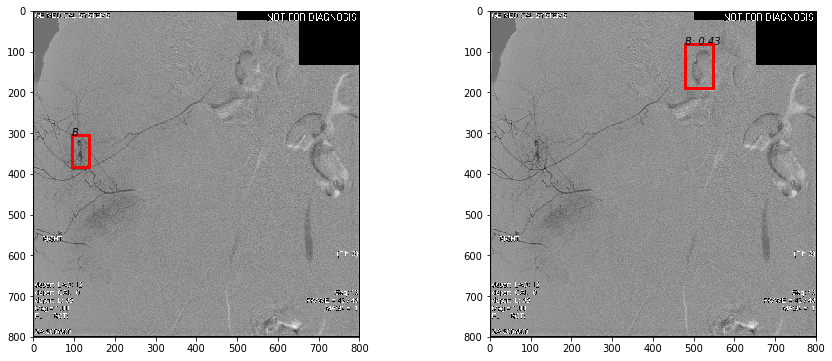

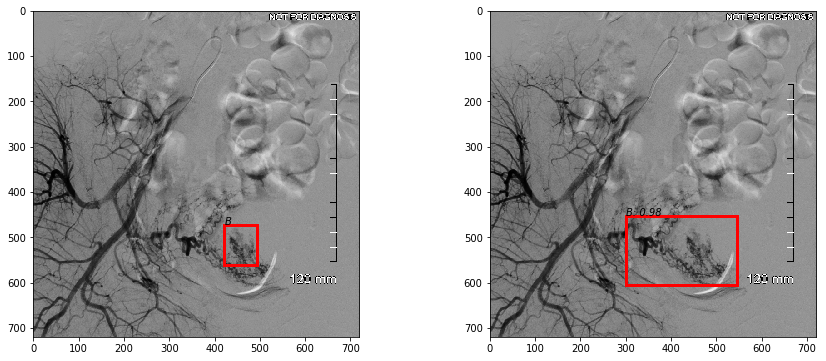

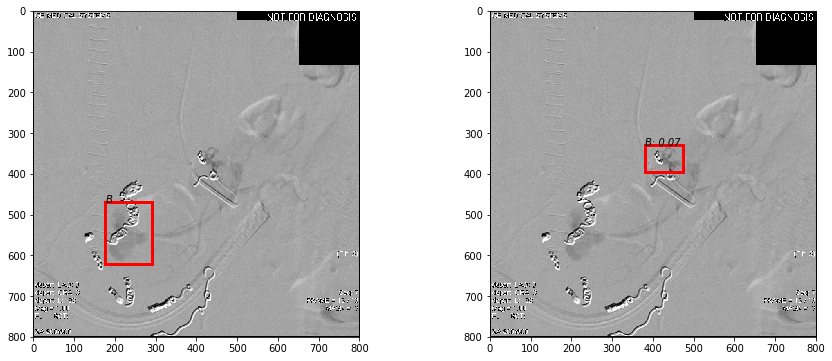

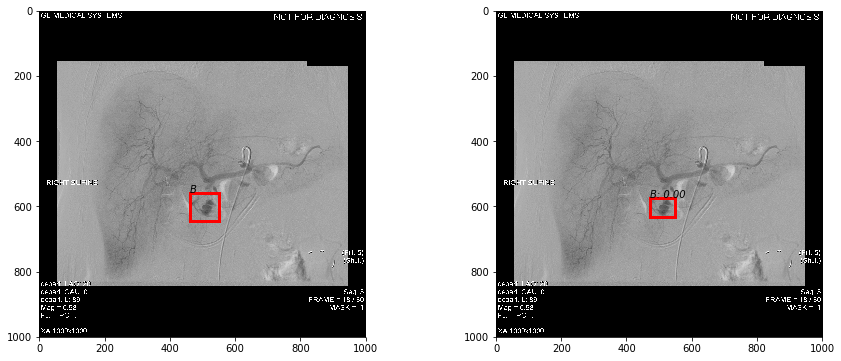

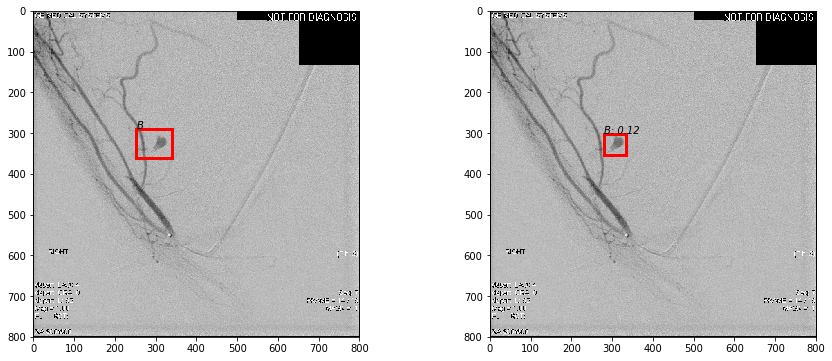

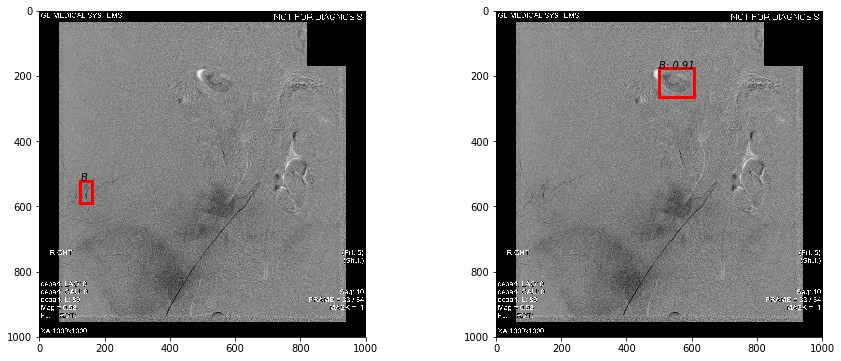

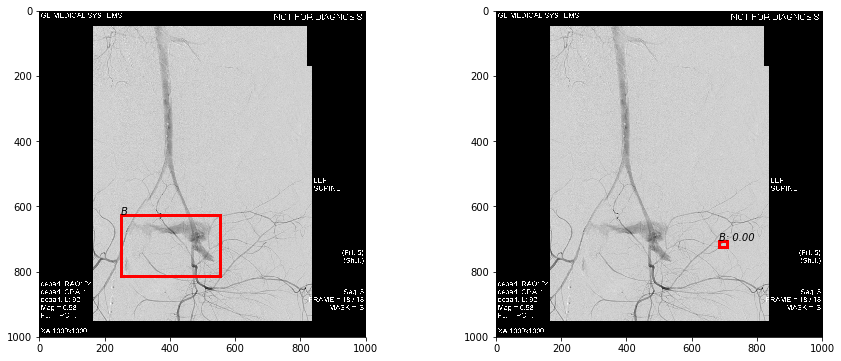

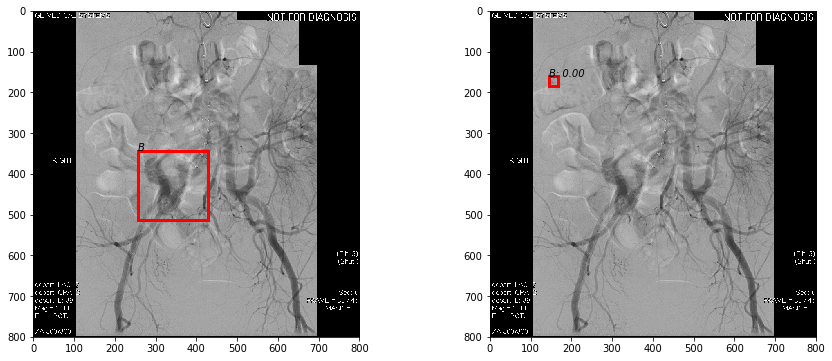

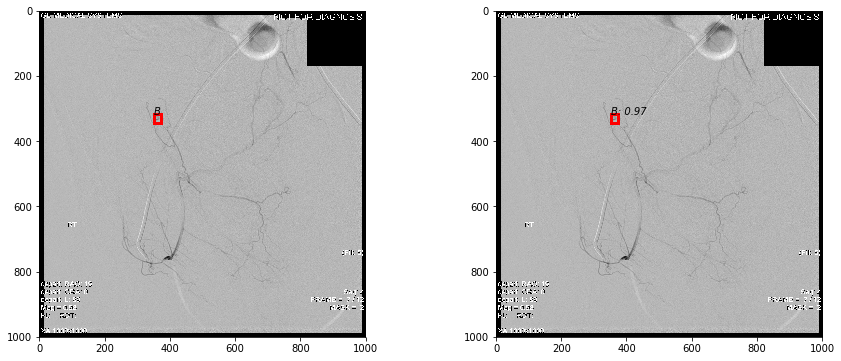

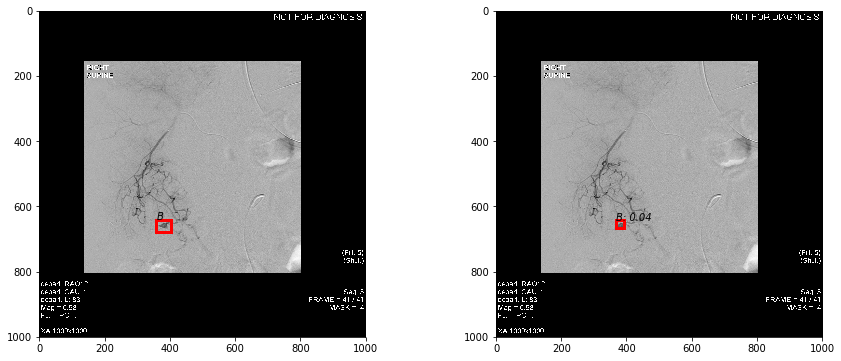

In [8]:
# import the iou function from  utils.evaluation

from utils.evaluation import bbox_iou
testIoUList = list()
for i in range(0,len(dataset_test)):
	print("Test image %d"%i)
	# Prediction of second image
	img, gt_bboxes, gt_labels = dataset_test[i]
	model.score_thresh = 0.00001
	pred_bboxes, pred_labels, pred_scores = model.predict([img])
	predbboxes = pred_bboxes[0].tolist()
	gtbboxes = gt_bboxes.tolist()
	print(predbboxes)
	print(gtbboxes)
	tmp = bbox_iou(predbboxes[0],gtbboxes[0])
	testIoUList.append(tmp)
	fig = plt.figure(figsize=(15,6))
	ax1 = fig.add_subplot(1, 2, 2)
	ax2 = fig.add_subplot(1, 2, 1)
	# plot prediction
	visualization.vis_bbox(img, pred_bboxes[0], pred_labels[0], pred_scores[0], label_names=bbox_label_names, ax=ax1)
	# plot ground truth
	visualization.vis_bbox(img, gt_bboxes, gt_labels, label_names=bbox_label_names,ax=ax2)
	
	fig.savefig("IoUtest"+str(i)+".png")
print("Done")

In [9]:
#print(testIoUList)
for item in testIoUList:
	print(item)

0.0
0.167977883807
0.0
0.576353481066
0.453753119916
0.0
0.0
0.0
0.860041820713
0.359524622961


In [14]:
Tlist = [x for x in testIoUList if x > 0.0 ]

In [15]:
print(Tlist)

[0.1679778838073891, 0.5763534810661073, 0.45375311991633205, 0.860041820712561, 0.3595246229614941]


In [16]:
p = 1.0 * len(Tlist) / len(testIoUList)

In [13]:
print(p)

0.3


In [17]:
# plot historygrarme 
import pandas as pd
df = pd.DataFrame({'IoU' : testIoUList})

<Figure size 1080x432 with 0 Axes>

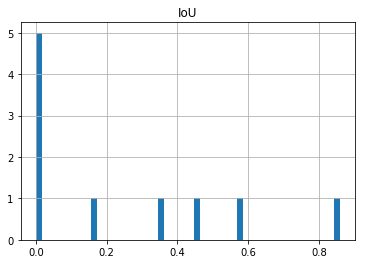

In [19]:
import matplotlib.pyplot as plt
import time

histgramFileName = "Hist_" + time.strftime("%Y%m%d_%H%M%S")
fig = plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1,1)
df.hist(bins=50, ax=ax)
fig.savefig(histgramFileName)